# <img src="../assets/logo_infnetv1.png" alt="Infnet logo" height="45"/> Projeto de Disciplina de Redes Neurais com TensorFlow
<img src="https://img.shields.io/badge/python-v._3.11.5-blue?style=flat-square&logo=python&logoColor=white" alt="python_logo" height="20"/>
<img src="https://img.shields.io/badge/jupyter-v._5.7.2-blue?style=flat-square&logo=jupyter&logoColor=white" alt="jupyter_logo" height="20"/>
<img src="https://img.shields.io/badge/anaconda-v._23.7.4-blue?style=flat-square&logo=anaconda&logoColor=white" alt="anaconda_logo" height="20"/>

#### Grupo: 

- Mateus Teixeira Ramos da Silva <a href="https://github.com/GitMateusTeixeira/03-ml-modeling"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>
- Fabio Ferreira Figueiredo <a href="https://github.com/fabioffigueiredo"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>
- Wilson Melo <a href="https://github.com/bakudas"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>
- Thiago Vinícius <a href="https://github.com/ubyss"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>
- Lauro Barbosa <a href="https://github.com/LMRocha"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>
- Felipe Szczpanski <a href="https://github.com/szczpanski"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>
- Iata Anderson <a href="https://github.com/AndersonSouza22"><img src="https://img.shields.io/badge/Github-151b23?style=flat-square&logo=github" alt="github_logo" height="20"/> </a>

### Sobre o projeto:

---

Se trata de um modelo de aprendizagem suprvisionado de classificação binária envolvendo dados relativos ao Câncer de Mama. Os dados foram extraídos do site do <a href="https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset">`Kaggle`</a>.

#### Convenções de reprodutibilidade:

- Todas as bibliotecas se encontram no arquivo `📄requirements.txt`
- Para mais informções, consulte nosso `README`

### Índice

---

- <a href='#parte-01-importar-os-pacotes'>Parte 01. Importar os pacotes</a>

- <a href='#parte-02-baixar-e-ler-os-dados'>Parte 02. Baixar e ler os dados</a>

- <a href='#parte-03-análise-exploratória'>Parte 03. Análise exploratória</a>

- <a href='#parte-04-tratamento-dos-dados-exclusão-da-coluna-nula'>Parte 04. Tratamento dos dados</a>

- <a href='#parte-05-verificando-a-correlação-entre-as-colunas'>Parte 05. Verificando a correlação entre as colunas</a>

- <a href='#parte-06-separar-as-features-utilizadas'>Parte 06. Separar as features</a>

- <a href='#parte-07-normalização-com-o-standard-scaller'>Parte 07. Normalização com o Standard Scaller</a>

- <a href='#parte-08-modelos-baseline'>Parte 08. Modelos baseline</a>

- - <a href='#81-criando-um-dumb-model-baseline-prevendo-tudo-como-a-classe-majoritária-para-validações-futuras'>8.1. Dumb model</a>

- - <a href='#82-criando-um-baseline-de-keras-padrão-sem-nenhum-finetuning'>8.2. Baseline com Keras padrão</a>

- <a href='#parte-09-grid-search-com-validação-cruzada'>Parte 09. Grid search com validação cruzada</a>

- <a href='#parte-10-comparação-dos-modelos'>Parte 10. Comparação dos modelos</a>

- <a href='#parte-11-streamlit'>Parte 11. Streamlit</a>

## Parte 01. Importar os pacotes

---

In [1]:
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
import warnings

from kaggle.api.kaggle_api_extended import KaggleApi
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, \
                            confusion_matrix, roc_curve, roc_auc_score, auc, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from tqdm.auto import tqdm


SEED = 42

pd.set_option("display.max_columns", 100)

# Silenciar os avisos do código
warnings.filterwarnings('ignore')

## Parte 02. Baixar e ler os dados

---

<a href='#índice'>Voltar ao início</a>

O arquivo será baixado diretamente do repositório do Kaggle. Caso a estrutura de pastas não exista, o algoritmo irá construí-la.

In [2]:
# Inicializar a API do Kaggle
api = KaggleApi()
api.authenticate()

# Criar o diretório se não existir
data_path = '../data/01-raw'
os.makedirs(data_path, exist_ok=True)

# Baixar os dados do Kaggle
api.dataset_download_files('wasiqaliyasir/breast-cancer-dataset', path=data_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset


In [3]:
path_raw = '../data/01-raw'
file_raw = 'Breast_cancer_dataset.csv'

pathfile_raw = os.path.join(path_raw, file_raw)

In [4]:
df = pd.read_csv(pathfile_raw)

## Parte 03. Análise exploratória

---

<a href='#índice'>Voltar ao início</a>

In [5]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 569 linhas e 33 colunas.


### 3.1. Visão geral do dataset

In [6]:
# Detalhando a base de dados com moda
def check(df):
    l = []
    colunas = df.columns
    
    for col in colunas:
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        sum_null = df[col].isnull().sum()

        # Calcula a moda e a frequência da moda
        moda = df[col].mode().iloc[0] if not df[col].mode().empty else "Não se aplica"
        moda_freq = df[col].value_counts().iloc[0] if not df[col].value_counts().empty else "Não se aplica"

        if np.issubdtype(dtypes, np.number):
            status = df.describe(include='all').T
            media = status.loc[col, 'mean']
            std = status.loc[col, 'std']
            min_val = status.loc[col, 'min']
            quar1 = status.loc[col, '25%']
            mediana = df[col].median()
            quar3 = status.loc[col, '75%']
            max_val = status.loc[col, 'max']
                    
        else:
            status = "Não se aplica"
            media = "Não se aplica"
            std = "Não se aplica"
            min_val = "Não se aplica"
            quar1 = "Não se aplica"
            mediana = "Não se aplica"
            quar3 = "Não se aplica"
            max_val = "Não se aplica"

        l.append([col, dtypes, nunique, sum_null, media, std, min_val, quar1, mediana, quar3, max_val, moda, moda_freq])
    
    # Criação do DataFrame com as novas colunas
    df_check = pd.DataFrame(l)
    df_check.columns = ['coluna', 'tipo', 'únicos', 'null_soma', 'media', 'desvio', 
                        'minimo', '25%', 'mediana', '75%', 'maximo', 'moda', 'frequência_moda']
    
    return df_check 

In [7]:
# Análise geral dos dados
check(df)

,coluna,tipo,únicos,null_soma,media,desvio,minimo,25%,mediana,75%,maximo,moda,frequência_moda
0,id,int64,569,0,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0,8670,1
1,diagnosis,object,2,0,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,Não se aplica,B,357
2,radius_mean,float64,456,0,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11,12.34,4
3,texture_mean,float64,479,0,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28,14.93,3
4,perimeter_mean,float64,522,0,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5,82.61,3
5,area_mean,float64,539,0,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0,512.2,3
6,smoothness_mean,float64,474,0,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634,0.1007,5
7,compactness_mean,float64,537,0,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454,0.1147,3
8,concavity_mean,float64,537,0,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268,0.0,13
9,concave points_mean,float64,542,0,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012,0.0,13


In [8]:
# Análise dos tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

É possível verificar que o dataset original possui 33 colunas, das quais uma ('Unamed: 32') possui apenas dados nulos.

Além disso, com execeção da coluna 'diagnosis' (que é uma coluna categórica), as demais colunas são colunas numéricas, com informações sobre cada paciente.

### 3.2. Análise da distribuição dos dados

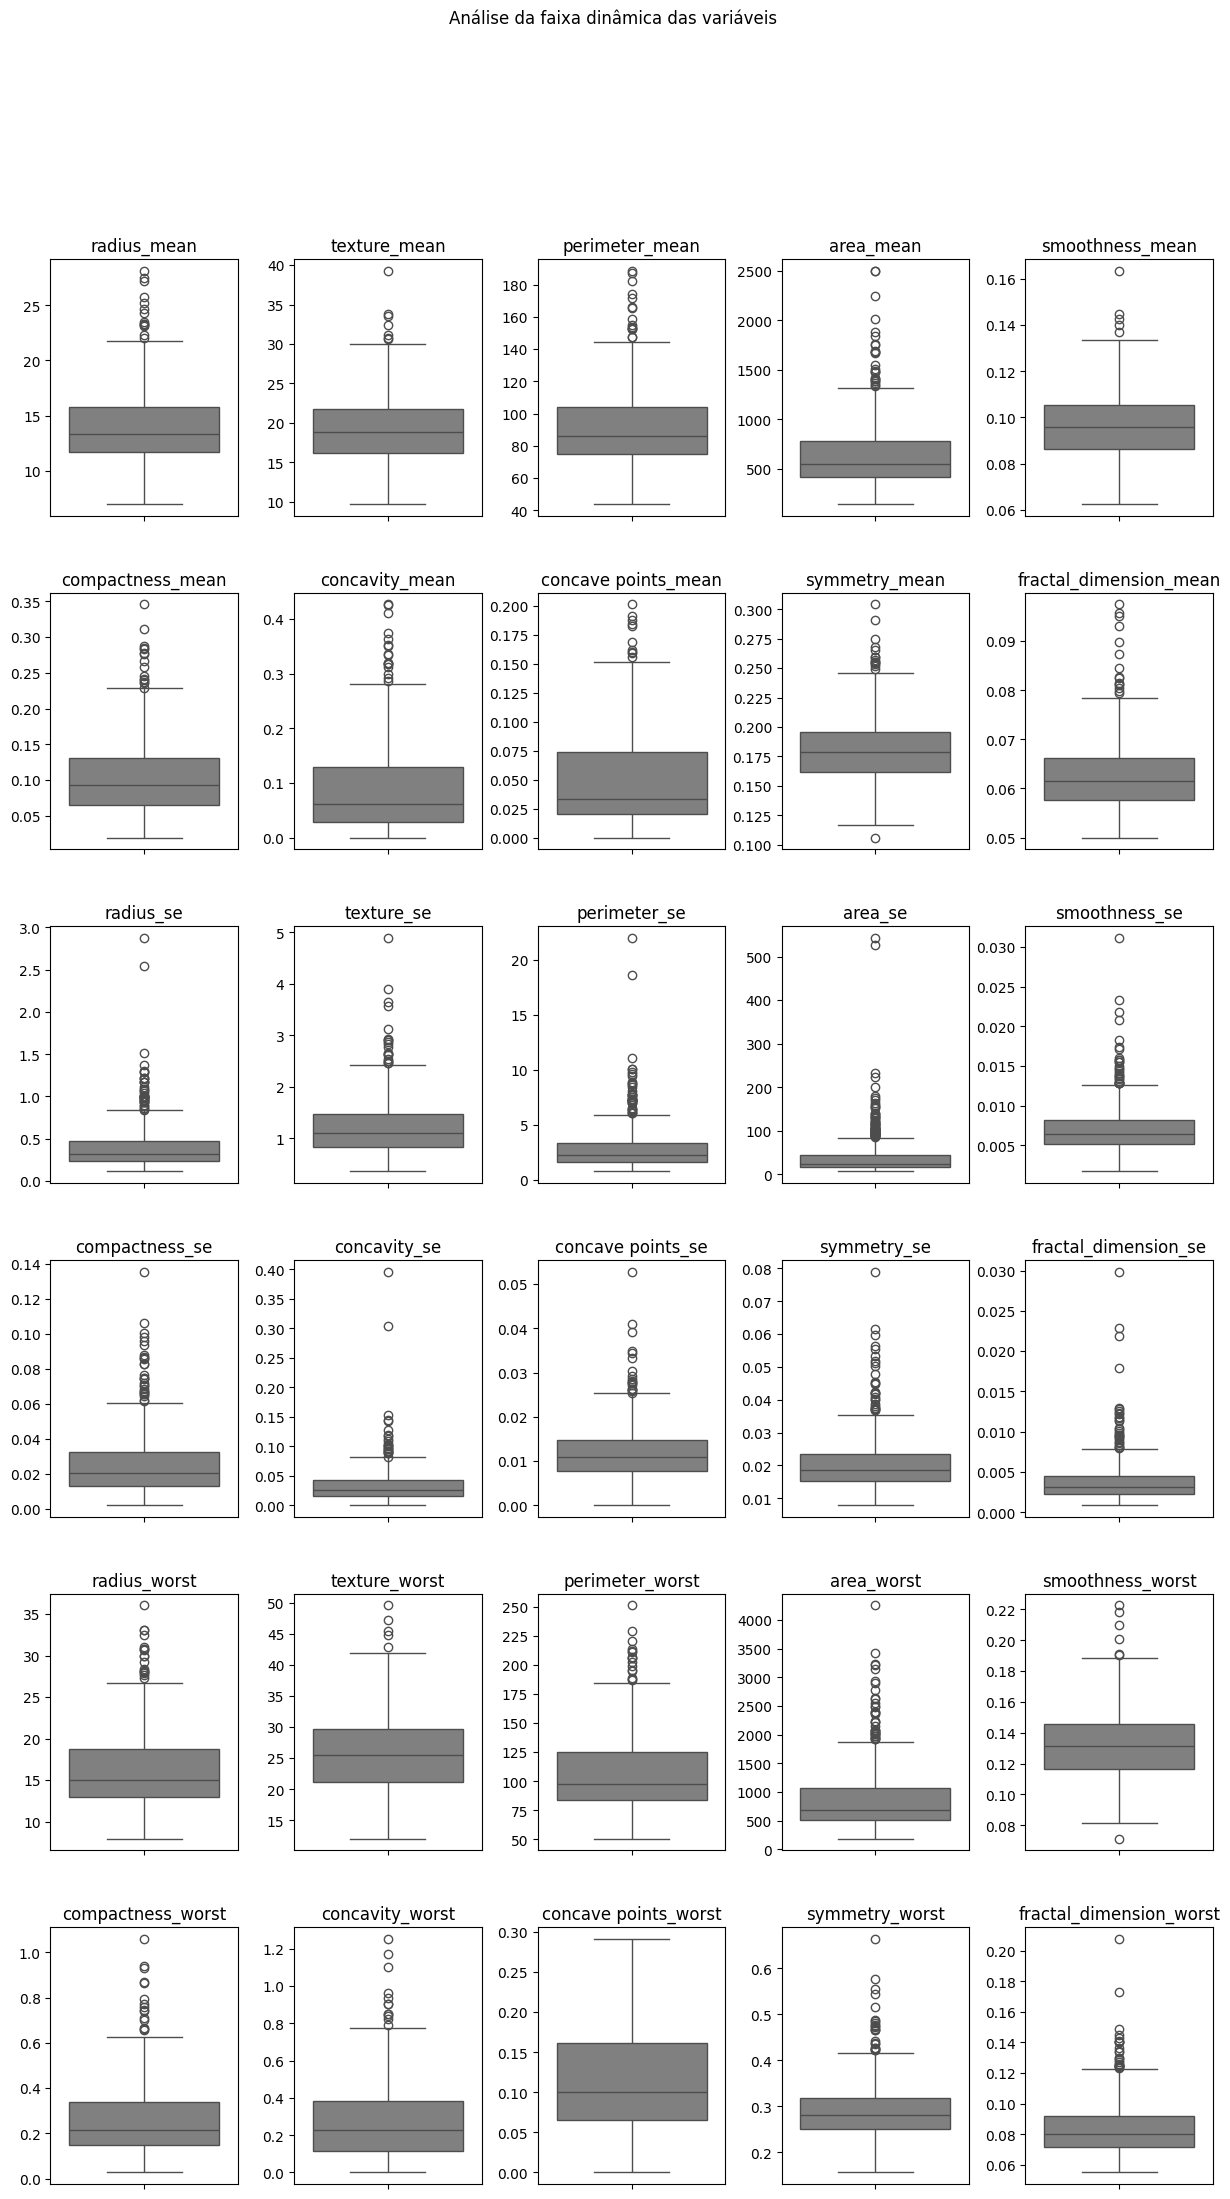

In [9]:
# Selecionar as colunas numéricas
col_num = df.columns[2:-1]

# Configurar o plano de fundo dos gráficos 3 x 3
fundo, eixos = plt.subplots(nrows=6, ncols=5, figsize=(15, 25))
fundo.suptitle("Análise da faixa dinâmica das variáveis")

eixos = eixos.flatten()

# Plotar os gráficos de cada coluna através de um loop
for i, col, in enumerate(col_num):
    sns.boxplot(data=df[2:-1], y=col, ax=eixos[i], color='gray')
    eixos[i].set_title(col)
    eixos[i].set_xlabel('')
    eixos[i].set_ylabel('')

# Configurar o espaçamento para não haver sobreposição
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Exibir o gráfico
plt.show()

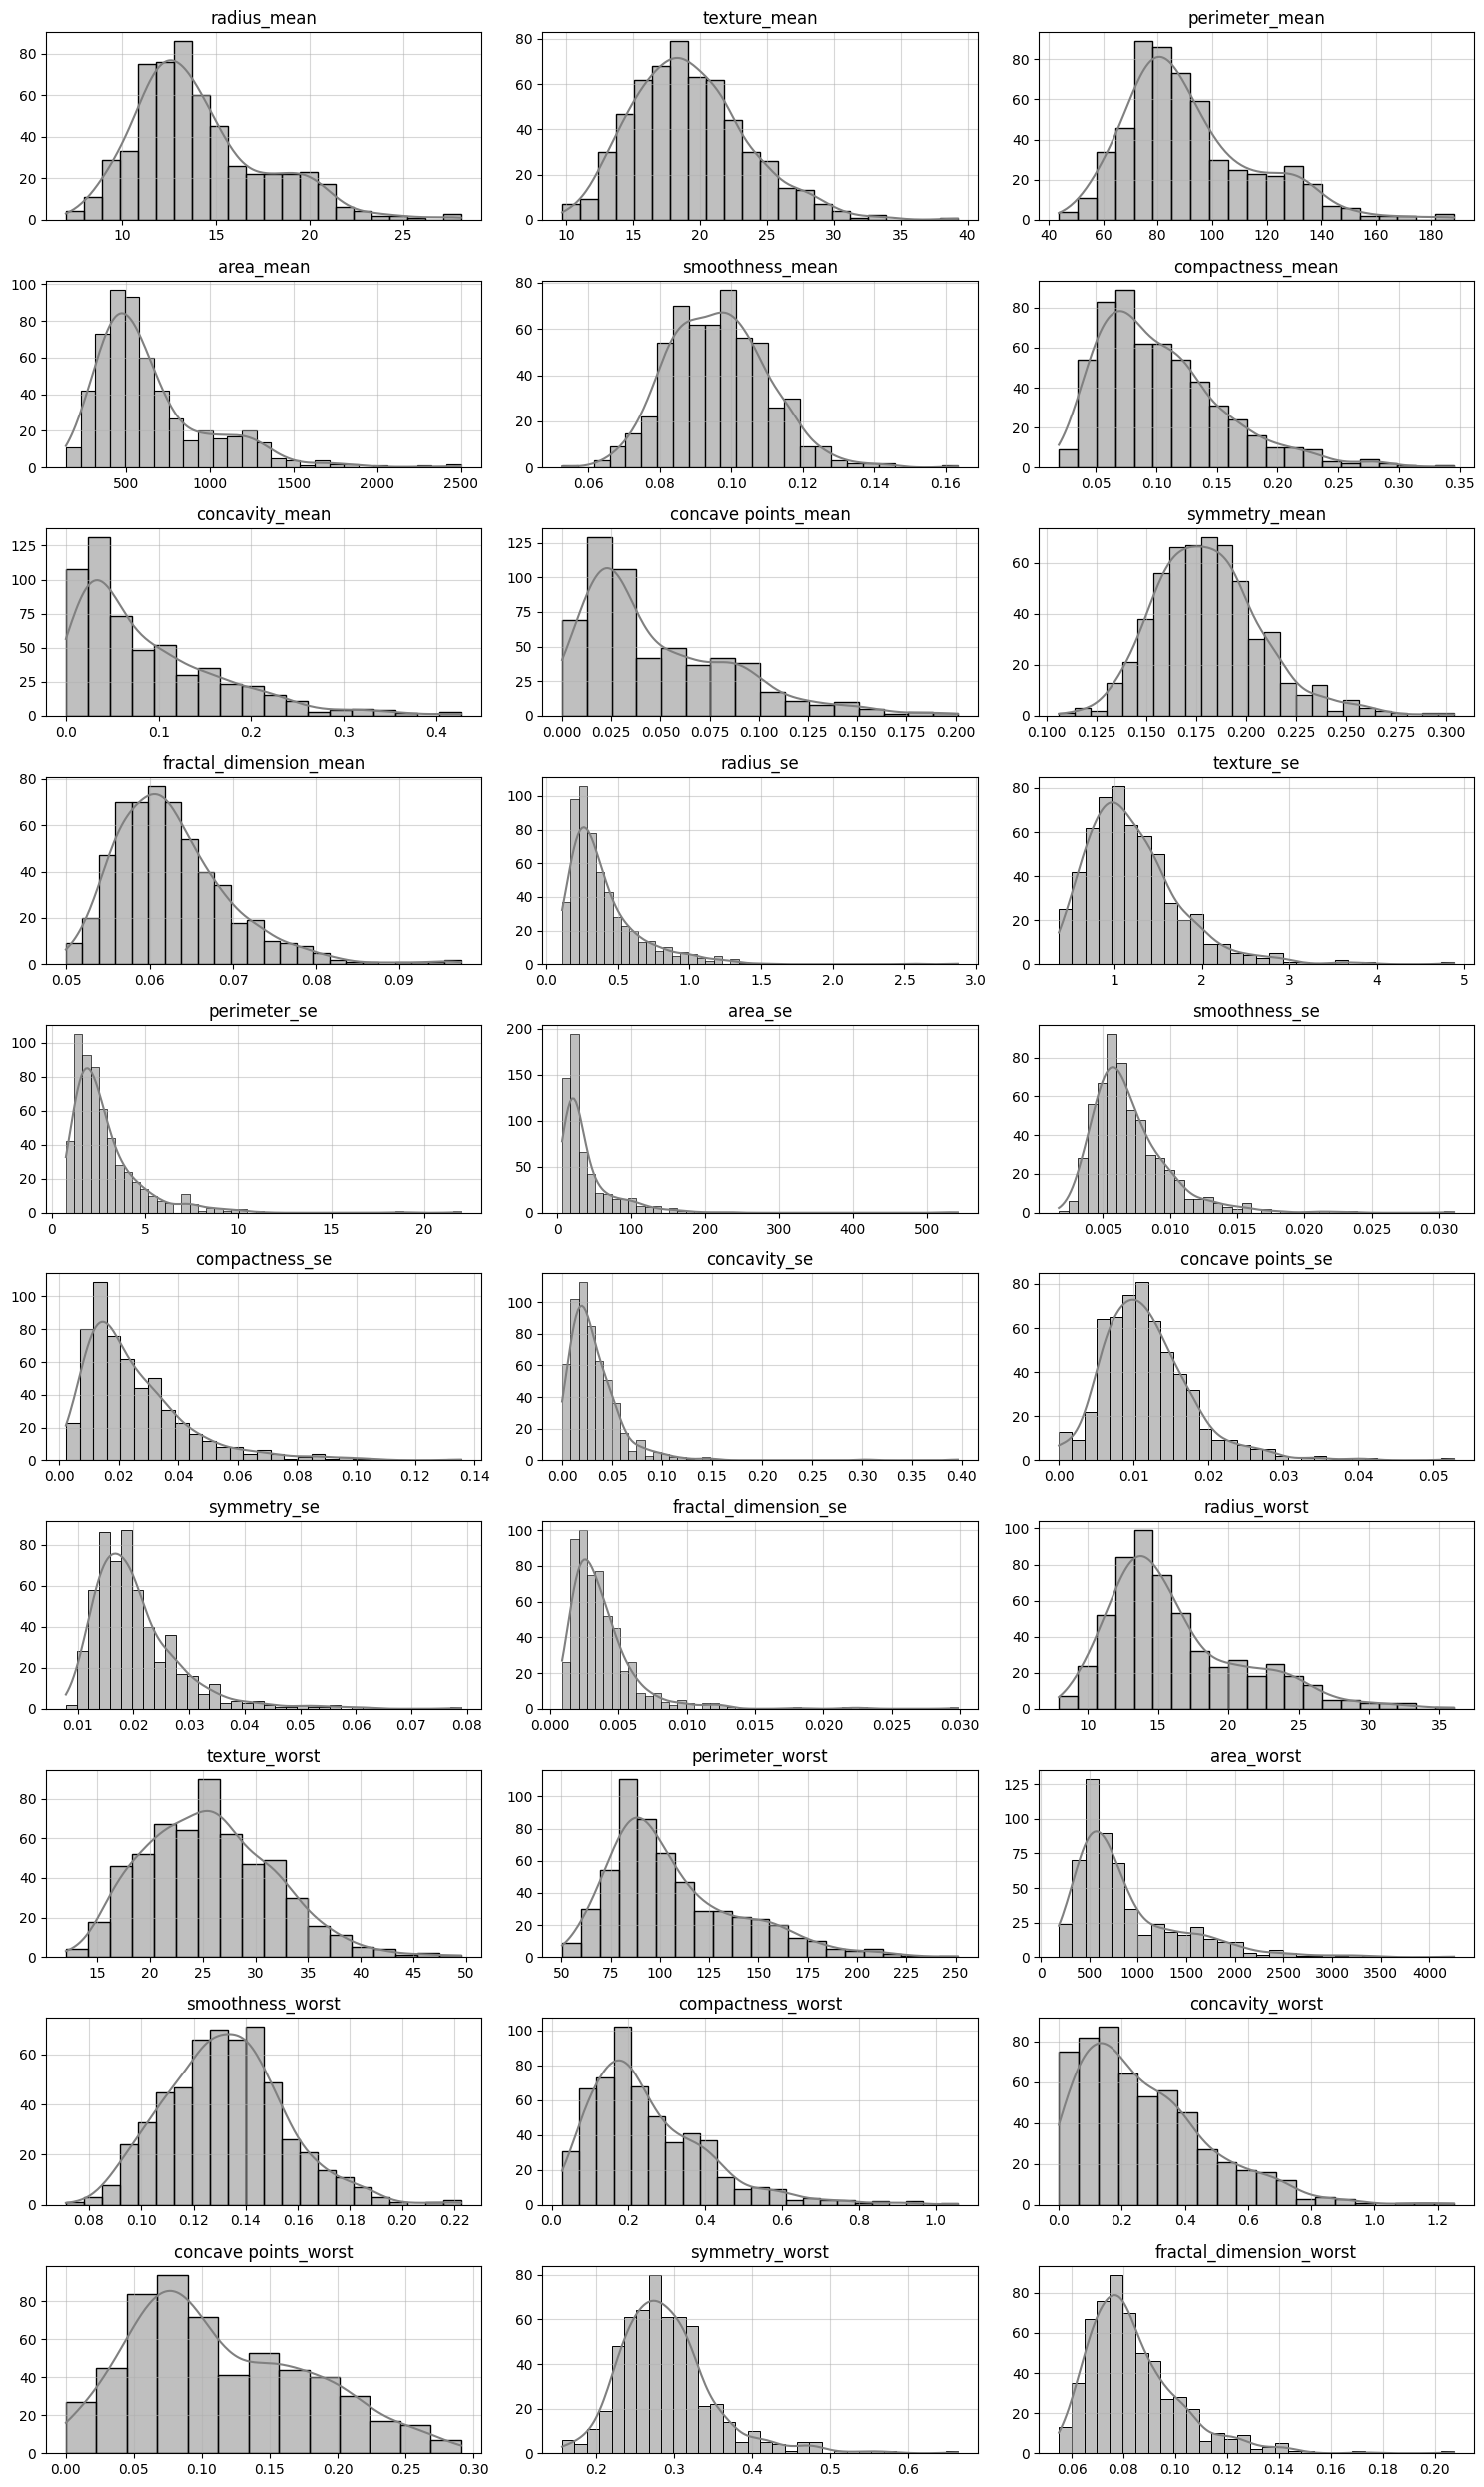

In [10]:
# Selecionar as colunas numéricas
col_num = df.columns[2:-1]  # Supondo que essas sejam as 30 variáveis

# Configurar o fundo da figura com 10 linhas e 3 colunas
plt.figure(figsize=(15, 25))

# Plotar os gráficos das colunas numéricas
for i in range(len(col_num)):
    plt.subplot(10, 3, i + 1)
    sns.histplot(df[col_num[i]], color='gray', kde=True)
    plt.title(col_num[i])
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, alpha=0.5)

# Garantir que não haja sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

### 3.3. Balanceamento dos dados

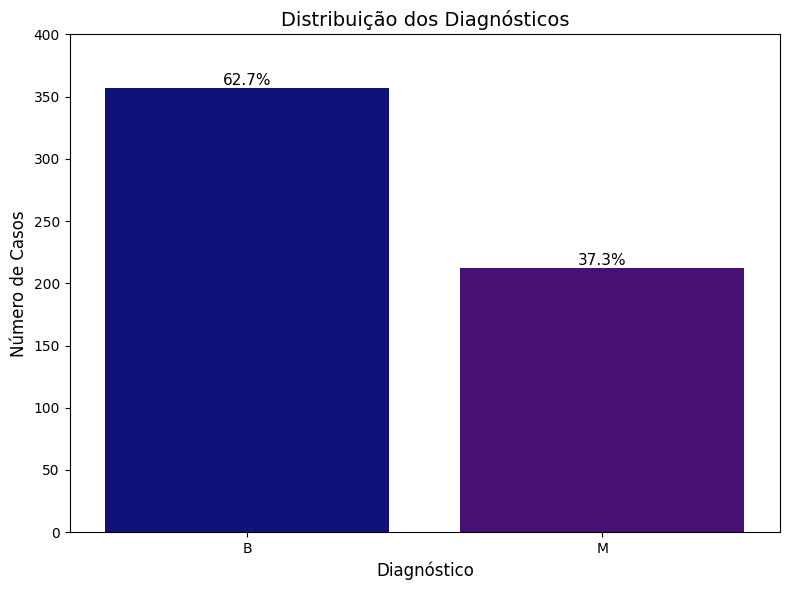

In [11]:
# Contagem dos valores únicos
contagem = df['diagnosis'].value_counts()
porcentagem = contagem / contagem.sum() * 100

# Preparar DataFrame para plotagem
dados_plot = pd.DataFrame({
    'Diagnóstico': contagem.index,
    'Casos': contagem.values,
    'Porcentagem': porcentagem.values
})

# Paleta personalizada: roxo escuro e azul escuro
colors = ['#00008B', '#4B0082']

# Plotando o gráfico
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Diagnóstico', y='Casos', data=dados_plot, palette=colors)

# Adicionando porcentagens no eixo X
for i, p in enumerate(ax.patches):
    valor = dados_plot['Porcentagem'][i]
    ax.annotate(f'{valor:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black')

# ajustar o limite do eixo y
ax.set_ylim(0, 400)

plt.title('Distribuição dos Diagnósticos', fontsize=14)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.tight_layout()
plt.show()



A partir da análise preliminar, observa-se a presença de outliers em diversas variáveis, o que reforça a importância da normalização dos dados para garantir a uniformidade das escalas e evitar distorções durante o treinamento dos modelos.

Além disso, nota-se um desequilíbrio na distribuição da variável alvo, que não segue uma forma gaussiana. Essa assimetria pode impactar negativamente o desempenho dos algoritmos de classificação, especialmente aqueles sensíveis à distribuição das classes.

In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Parte 04. Tratamento dos dados. Exclusão da coluna nula

---

<a href='#índice'>Voltar ao início</a>

In [13]:
# Excluindo a primeira ('id') e última ('Unamed: 32') colunas
df = df.iloc[:, 1:-1]

## Parte 05. Verificando a correlação entre as colunas

---

<a href='#índice'>Voltar ao início</a>

In [14]:
cols = [c for c in df.columns]

In [15]:
cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

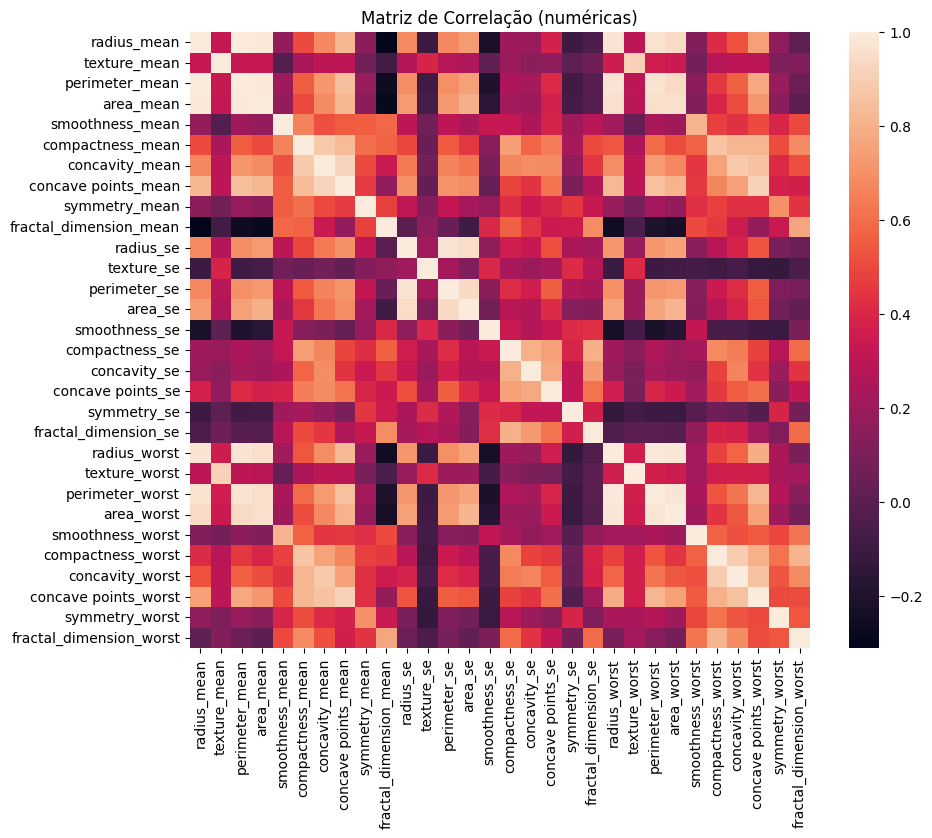

In [16]:
if len(df.columns) > 1:
    corr = df.corr(numeric_only=True)

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=False)
    plt.title("Matriz de Correlação (numéricas)")
    plt.show()

### 5.1. Identificando as colunas mais relevantes com nosso futuro predict (coluna '`diagnosis`')

In [17]:
# Realizando a transformação da coluna categórica de texto para número
df['diagnosis_encoded'] = LabelEncoder().fit_transform(df['diagnosis']) # 'M' vira 1, 'B' vira 0

# ou
#df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 1})

In [18]:
df.iloc[:, [0, -1]].sample(2, random_state=SEED)

,diagnosis,diagnosis_encoded
204,B,0
70,M,1


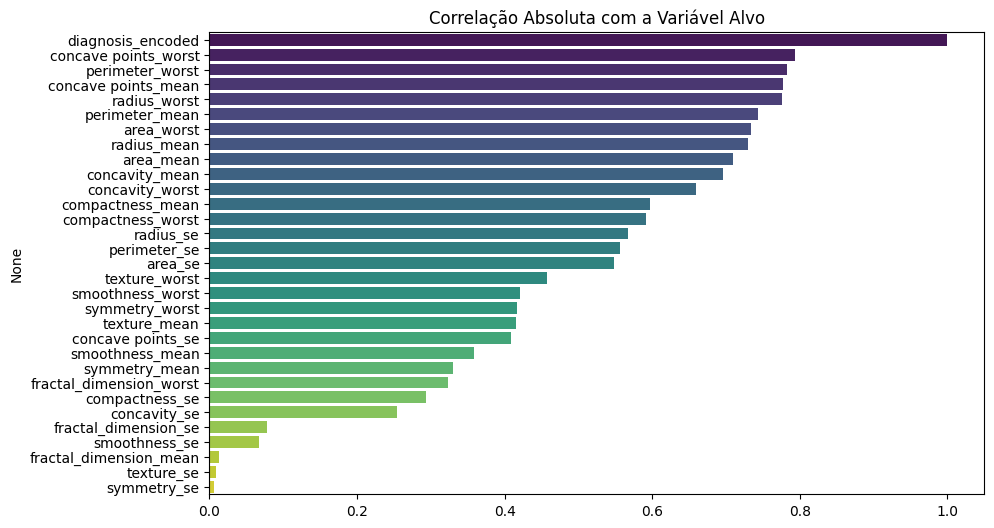

In [19]:
# Supondo que a variável alvo seja 'diagnosis'
correlacoes = df.drop(columns=['diagnosis']).corr()['diagnosis_encoded'].abs().sort_values(ascending=False)

#correlacoes.plot(kind='bar', figsize=(12,6), title='Correlação com diagnóstico (codificado)')

# Visualizar as correlações
plt.figure(figsize=(10,6))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette='viridis')
plt.title('Correlação Absoluta com a Variável Alvo')
plt.show()

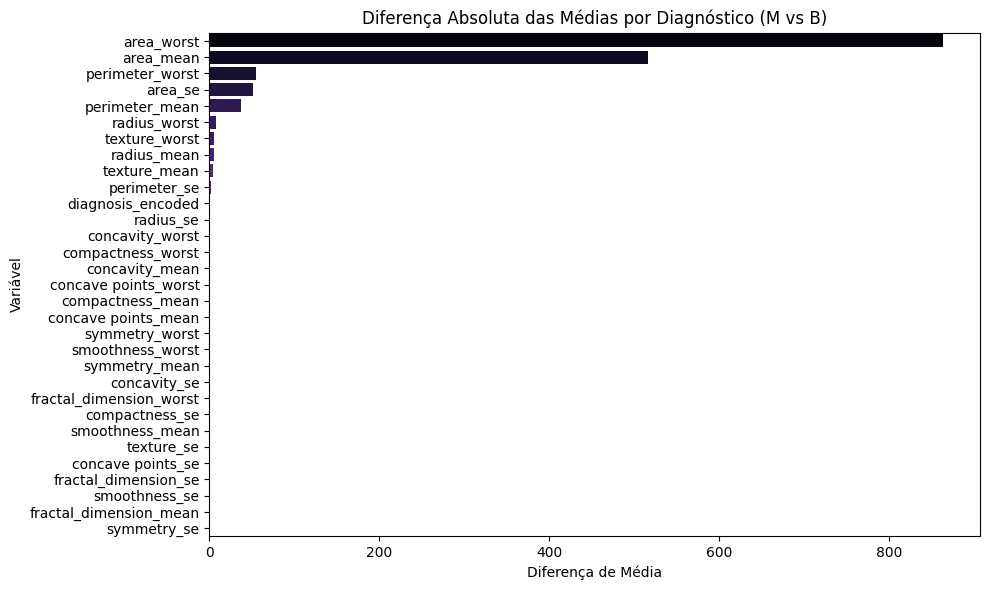

In [20]:
# Separar os dados por classe
grupo_m = df[df['diagnosis'] == 'M'].drop(columns=['diagnosis'])
grupo_b = df[df['diagnosis'] == 'B'].drop(columns=['diagnosis'])

# Calcular a diferença absoluta entre as médias
diferencas = (grupo_m.mean() - grupo_b.mean()).abs().sort_values(ascending=False)

# Visualizar em gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=diferencas.values, y=diferencas.index, palette='magma')
plt.title('Diferença Absoluta das Médias por Diagnóstico (M vs B)')
plt.xlabel('Diferença de Média')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

## Parte 06. Separar as features utilizadas

---

<a href='#índice'>Voltar ao início</a>

Com exceção das colunas de 'id' e 'Unnamed: 32', todas as demais colunas permanecerão, inicialmente

In [21]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_encoded'],
      dtype='object')

### 6.1. Separando os dados `X` do Target `y`

In [22]:
# selecionando as features utilizadas
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',  'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
            'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
            'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [23]:
# selecionando as features utilizadas (correlação)
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',  'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 
            'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
            'concave points_worst']

In [24]:
X = df[features]

# ou
# X = df.iloc[1:-1]

y = df['diagnosis_encoded']

### 6.2. Separando treino e teste

Com o '_X_' e o '_y_' bem definidos, vamos analisar a necessidade de separar o dataset em treino e teste, de modo a auxiliar no processo de validação (dependendo do problema, essa separação pode não ser necessária), invocando a biblioteca '_train_test_split_' e definindo seus parâmetros (como 'test_size', 'train_size', 'random_state', ...). Caso haja necessidade de separá-los, convencionalmente se chamarão '_train_X_', '_val_X_', '_train_y_', '_val_y_'.

In [25]:
# separar treino x teste
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y,   # define o conjunto de dados e o target predict
                                                    test_size=0.2,      # define o tamanho do conjunto de teste
                                                    random_state=17,    # salva uma seed para reproduções futuras
                                                    shuffle=True,       # determina o embaralhamento do dataset antes da separação
                                                    stratify=y    # garante a proporção entre as classes
                                                    )

Vale lembrar que, em datasets grandes (big data) ou em casos de uso de modelos de alta complexidade (como deep learning), é comum adotar a separação dos dados em três conjuntos distintos: treino, teste e validação. Nesse cenário, o conjunto de validação é utilizado para realizar o fine tuning do modelo sem a necessidade de reentreinamento completo, o que é especialmente relevante devido ao alto custo computacional envolvido.

Já em datasets menores, é possível aplicar a abordagem de validação cruzada (cross-validation), na qual os dados são divididos em múltiplas “dobras” (folds) e o modelo é avaliado em cada uma delas. Essa técnica permite uma análise mais robusta do desempenho sem exigir um conjunto de validação separado — abordagem que será adotada neste caso.

Após a separação dos conjuntos, caso seja identificada uma disparidade significativa na distribuição das variáveis, é essencial realizar o escalonamento adequado dos dados, seja por meio da padronização ou da normalização. Para este projeto, utilizaremos a Padronização Padrão (Standard Scaler), que transforma os dados para que tenham média zero e desvio padrão igual a um, contribuindo para a estabilidade e eficiência dos algoritmos de aprendizado.

## Parte 07. Normalização com o `Standard Scaller`

---

<a href='#índice'>Voltar ao início</a>

O dataset de câncer de mama disponível no Kaggle contém 30 variáveis numéricas que descrevem propriedades dos núcleos celulares, como raio, textura, perímetro, área, entre outras. Essas variáveis apresentam escalas bastante diferentes — por exemplo:

- `mean_radius`: varia de aproximadamente 6.98 a 28.11

- `mean_area`: varia de 143.5 a 2501.0

- `mean_smoothness`: varia de 0.053 a 0.163

Essa disparidade pode afetar negativamente o desempenho de algoritmos sensíveis à escala dos dados.

Para resolver isso, aplicamos o Standard Scaler, que transforma cada feature para que tenha média zero e desvio padrão igual a um, garantindo que todas as variáveis contribuam de forma equilibrada para o modelo.

In [26]:
# implementar o modelo de normalização
scaler = StandardScaler(
                        with_mean=True,     # Padrão=True. Subtrai a média dos dados, centralizando o resultado
                        with_std=True,      # Padrão=True. Divide pelo desvio padrão
                        copy=True           # Padrão = Trua. Cria uma cópia de segurança antes da transformação
                        )

In [27]:
# ajustar (fit) apenas os dados de treino
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [28]:
# transformar os dados de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vale lembrar que o escalonamento deve ser feito após a separação dos sets para evitar o que chamamos de 'vazamento dos dados' (se o treinamento ocorrer em todo conjunto de dados, você está considerando os dados de treino para calcular a média, a mediana, o IQR, ... dos dados de treino, o que afetará os resultados). 

Nesse momento, passamos para a fase de definir qual modelo de classificação melhor se enquadra no problema que estamos enfrentando, definindo seus parâmetros e hiperparâmetros necessários para a predição desejada (como 'n_jobs', 'random_state', 'max_iter', ...).

A partir daí, caso seja aplicada a validação cruzada, o 'ajuste' ('fit') e a 'predição' (predict) já estão inerentes ao StratifiedKFold, onde passamos os parâmetros (número de dobras) e ele treinará os modelos automaticamente.

Caso a validação cruzada não seja aplicada, vamos 'ajustar' (ou 'treinar') o modelo, utilizando o método '_fit_', onde passaremos a dupla: ('_train_X_', '_train_y_') (ou apenas ('_X_','_y_'), caso não haja separação). 

- A estrutura seria algo como: "_modelo.fit(train_X, train_y)_" ou "_modelo.fit(X, y)_".

Com o modelo definido e ajustado, é hora de realizar as predições, com o método 'predict' utilizando '_val_X_', caso haja separação de treino x teste. A variável pode ser chamada de '_y_hat_' (de 'chápeu', fazendo alusão aos números preditos em notação científica que possuem o símbolo de ^).

- A estrutura seria algo como: "_y_hat = modelo.predictfit(val_X)_" ou "_y_hat = modelo.predict(X)_".

Com a predição em mãos, passamos para a fase de validação, de modo a verificar e comprovar a eficiência do modelo construído. Para tanto, existem algumas métricas que podemos usar, como a negocial ou a estatística.

As métricas negociais envolvem puramente o conhecimento do negócio que está sendo tratado (exemplo: o nível de glicose acima de 99 mg/dL define uma pessoa diabética), por essa ótica, o modelo será eficaz caso siga corretamente as regras de negócio atrelada ao dataset.

As métricas estatísticas, por seu turno, possuem um escopo mais amplo. Podendo se dividir em métricas de viés e variância e serão utilizadas a depender do problema que queremos prever (exemplo: 'se há indícios de fraude ou não', 'se o avião pode cair ou não', 'se o paciente pode ter câncer ou não', ...). Isso por que, um modelo que possui 99% de precisão (por exemplo), pode não ser nada efetivo se não responder o problema que queremos resolver ou não alcançar a generalização (capacidade de prever cenários futuros com eficiência). Isso pode se dar por vários motivos, como uma base desbalanceada (quando há muito mais de um grupo que de outro), o modelo não for o adequado ou não for passado os parâmetros corretos.

Essa métricas nos auxiliam, inclusive, a entender e melhorar os modelos criados, definindo valores otimizados de parâmetros para cada caso.

Em último lugar, em conjunto com a validação, temos a otimização do modelo ('tuning'), que, embora inicialmente experimental, permite implementar a melhor combinação de parâmetros, se levado em consideração os fatores acima.

## Parte 08. Modelos baseline

---

<a href='#índice'>Voltar ao início</a>

### 8.1. Criando um dumb model baseline (prevendo tudo como a classe majoritária) para validações futuras

In [29]:
# Identificar a classe majoritária no conjunto de treino
classe_majoritaria = y_train.value_counts().idxmax()

In [30]:
# Criar previsões para o conjunto de teste
y_hat_dumb = np.full_like(y_test, fill_value=classe_majoritaria)

In [31]:
# Métricas principais
print("Relatório de Métricas")
print(classification_report(y_test, y_hat_dumb))

print("Accuracy Score:", accuracy_score(y_test, y_hat_dumb))
print("Precision Score:", precision_score(y_test, y_hat_dumb, pos_label=classe_majoritaria))
print("Recall Score:", recall_score(y_test, y_hat_dumb, pos_label=classe_majoritaria))
print("F1 Score:", f1_score(y_test, y_hat_dumb, pos_label=classe_majoritaria))

Relatório de Métricas
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114

Accuracy Score: 0.631578947368421
Precision Score: 0.631578947368421
Recall Score: 1.0
F1 Score: 0.7741935483870968


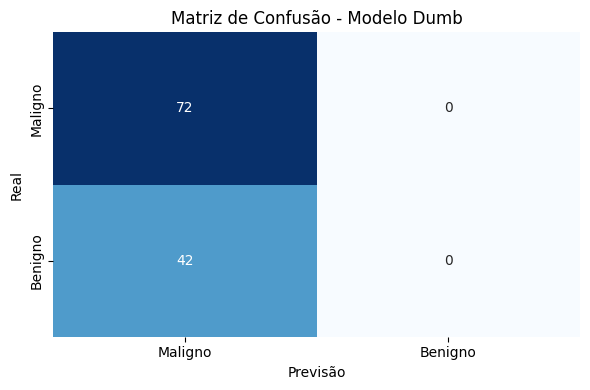

In [32]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_hat_dumb)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Maligno', 'Benigno'],
            yticklabels=['Maligno', 'Benigno'])

plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Modelo Dumb')
plt.tight_layout()
plt.show()


ROC AUC Score: 0.5


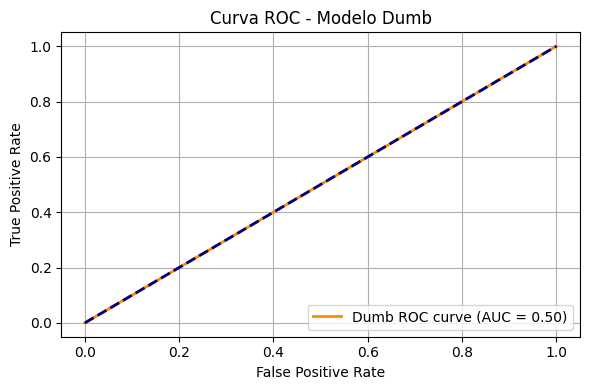

In [33]:
# Curva ROC e AUC
# Para calcular a curva ROC, precisamos de probabilidades — como o dumb não gera isso,
# simulamos com 0 para a classe minoritária e 1 para a majoritária
y_prob_dumb = np.where(y_hat_dumb == classe_majoritaria, 1, 0)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dumb, pos_label=classe_majoritaria)
roc_auc = auc(fpr, tpr)

print("\nROC AUC Score:", roc_auc)

# Plot da curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Dumb ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Dumb')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

### 8.3. Criando um baseline de Regressão Logistica

In [34]:
# implementar o modelo de Regressão Logística (Logistic Regression Model) para o Grid Search
rl_model = LogisticRegression(
                            dual=False,
                            tol=0.0001,
                            fit_intercept=True,
                            intercept_scaling=1.0,
                            class_weight='balanced',
                            random_state=17,
                            max_iter=1000,
                            verbose=0,
                            warm_start=False,
                            n_jobs=None
                            )

In [35]:
# Treinando o modelo
rl_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1.0
,class_weight,'balanced'
,random_state,17
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
# Previsões
y_pred_rl = rl_model.predict(X_test_scaled)
y_prob_rl = rl_model.predict_proba(X_test_scaled)[:, 1]

In [37]:

# Relatório de métricas
print("Relatório de Métricas - Regressão Logística")
print(classification_report(y_test, y_pred_rl))

print("Accuracy:", accuracy_score(y_test, y_pred_rl))
print("Precision:", precision_score(y_test, y_pred_rl))
print("Recall:", recall_score(y_test, y_pred_rl))
print("F1 Score:", f1_score(y_test, y_pred_rl))

Relatório de Métricas - Regressão Logística
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy: 0.9473684210526315
Precision: 0.95
Recall: 0.9047619047619048
F1 Score: 0.926829268292683


### 8.3. Criando um baseline de Keras padrão (sem nenhum fine tuning)

In [38]:
# Definindo o modelo
sq_base_model = Sequential([
                            Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
                            Dense(8, activation='relu'),
                            Dense(1, activation='sigmoid')  # Saída binária
                            ])

In [39]:
# Compilando o modelo
sq_base_model.compile(
                        optimizer=Adam(learning_rate=0.001),
                        loss='binary_crossentropy',
                        metrics=['accuracy']
                        )

In [40]:
# Treinando o modelo
history = sq_base_model.fit(
                            X_train_scaled, y_train,
                            epochs=50,
                            batch_size=32,
                            validation_data=(X_test_scaled, y_test),
                            verbose=1
                            )

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3407 - loss: 0.7959 - val_accuracy: 0.3421 - val_loss: 0.7228
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3978 - loss: 0.6789 - val_accuracy: 0.5088 - val_loss: 0.6307
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5934 - loss: 0.5956 - val_accuracy: 0.8158 - val_loss: 0.5674
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8659 - loss: 0.5449 - val_accuracy: 0.8947 - val_loss: 0.5294
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9099 - loss: 0.5106 - val_accuracy: 0.9211 - val_loss: 0.4973
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.4794 - val_accuracy: 0.9298 - val_loss: 0.4634
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.4435 - val_accuracy: 0.9298 - val_loss: 0.4227
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.3985 - val_accuracy: 0.9474 - val_loss

In [41]:
# 1. Previsões
y_prob_base_keras = sq_base_model.predict(X_test_scaled).ravel()  # Probabilidades
y_hat_base_keras = (y_prob_base_keras > 0.5).astype(int)       # Classe prevista

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [42]:
# 2. Métricas principais
print("Relatório de Métricas - Modelo Keras")
print(classification_report(y_test, y_hat_base_keras))

print("Accuracy Score:", accuracy_score(y_test, y_hat_base_keras))
print("Precision Score:", precision_score(y_test, y_hat_base_keras))
print("Recall Score:", recall_score(y_test, y_hat_base_keras))
print("F1 Score:", f1_score(y_test, y_hat_base_keras))

Relatório de Métricas - Modelo Keras
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544
Precision Score: 0.975
Recall Score: 0.9285714285714286
F1 Score: 0.9512195121951219


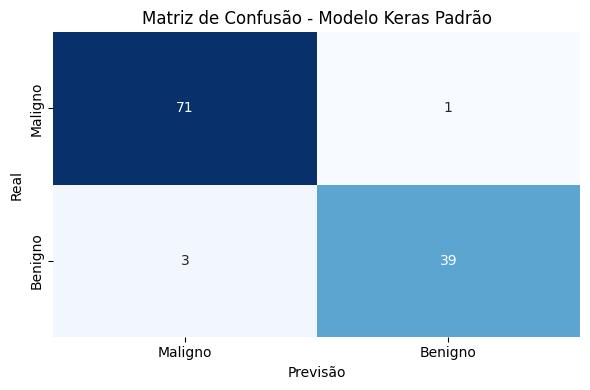

In [43]:
# Matriz de confusão
cm_keras = confusion_matrix(y_test, y_hat_base_keras)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Maligno', 'Benigno'],
            yticklabels=['Maligno', 'Benigno'])

plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Modelo Keras Padrão')
plt.tight_layout()
plt.show()


ROC AUC Score: 0.9927248677248677


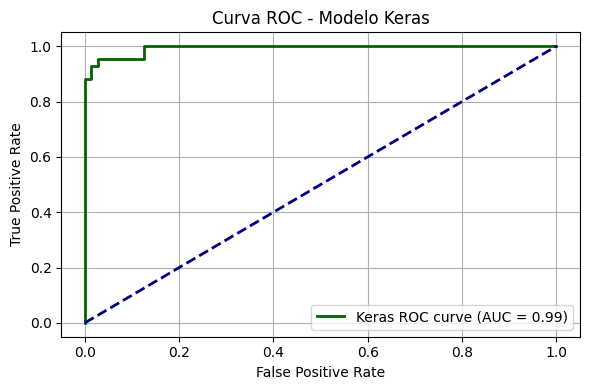

In [44]:
# Curva ROC e AUC
fpr_keras, tpr_keras, _ = roc_curve(y_test, y_prob_base_keras)
roc_auc_keras = auc(fpr_keras, tpr_keras)

print("\nROC AUC Score:", roc_auc_keras)

plt.figure(figsize=(6, 4))
plt.plot(fpr_keras, tpr_keras, color='darkgreen', lw=2,
         label=f'Keras ROC curve (AUC = {roc_auc_keras:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Keras')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

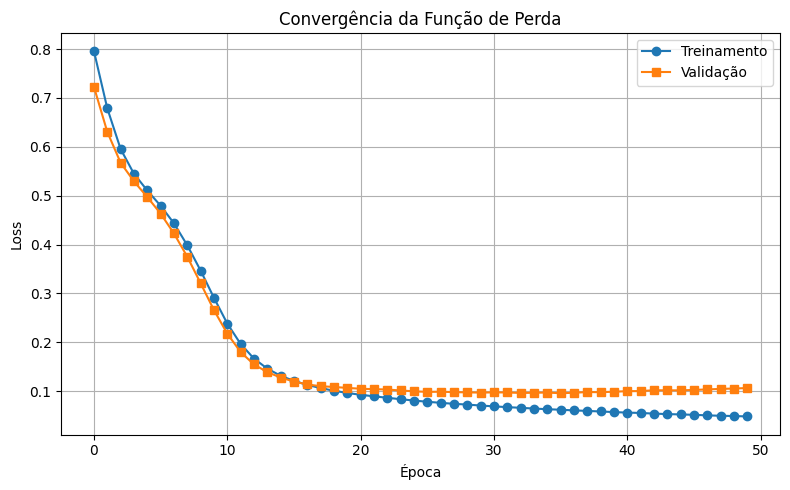

In [45]:
# Acessar os dados de perda
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotar o gráfico
plt.figure(figsize=(8,5))
plt.plot(loss, label='Treinamento', marker='o')
plt.plot(val_loss, label='Validação', marker='s')
plt.title('Convergência da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Embora os resultados preliminares sejam muito bons, isso também pode indicar um comportamento de overfitting. Por isso é preciso realizar um fine tuning no modelo com ajustes de hiperparâmetros, cross validation e regularização.

## Parte 09. Grid search com validação cruzada

---

<a href='#índice'>Voltar ao início</a>

In [46]:
def build_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # saída binária
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['Recall'])

    return model

In [47]:
keras_model = KerasClassifier(build_fn=build_model, verbose=0)

In [48]:
param_grid = {
    'model__activation': ['relu', 'tanh'],
    'model__dropout_rate': [0.0, 0.3, 0.5],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [49]:
recall_scorer = make_scorer(recall_score, average='binary', pos_label=1)

In [50]:
# criar K-Fold estratificado (padrão para todos os modelos)
kf = StratifiedKFold(
                    n_splits=10,            # quantidade de 'dobras' (ou 'folds')
                    shuffle=True,           # se os dados serão embaralhados ou não
                    random_state=SEED       # salva uma semente para repetição
                    )

# armazenar as métricas de cada modelo
results = {}

In [51]:
grid_search = GridSearchCV(
                            estimator=keras_model,
                            param_grid=param_grid,
                            scoring=recall_scorer,
                            cv=kf,
                            n_jobs=-1,
                            refit=True)

In [52]:
grid_search.fit(X_train, y_train)

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'batch_size': [16, 32], 'epochs': [50, 100], 'model__activation': ['relu', 'tanh'], 'model__dropout_rate': [0.0, 0.3, ...]}"
,scoring,"make_scorer(r..., pos_label=1)"
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,None


In [53]:
# analisar os 10 melhores modelos e seus scores
keras_mean_scores = np.nan_to_num(grid_search.cv_results_['mean_test_score'])
keras_params = grid_search.cv_results_['params']

# ordenar os 10 melhores scores
keras_top_10 = keras_mean_scores.argsort()[::-1][:10]

# transformar em dataframe
keras_top_10_df = [
    {**keras_params[idx], "score": keras_mean_scores[idx]} for idx in keras_top_10
]

# criar o DataFrame
keras_top_10_df = pd.DataFrame(keras_top_10_df)

print("Top 10 melhores combinações de hiperparâmetros:")
print(keras_top_10_df)

Top 10 melhores combinações de hiperparâmetros:
   batch_size  epochs model__activation  model__dropout_rate     score
0          32     100              relu                  0.0  0.917647
1          16     100              relu                  0.0  0.894118
2          32      50              relu                  0.0  0.888235
3          16      50              relu                  0.3  0.876471
4          16      50              relu                  0.0  0.864706
5          16     100              relu                  0.3  0.864706
6          32     100              relu                  0.3  0.852941
7          16     100              tanh                  0.0  0.847059
8          32      50              relu                  0.3  0.841176
9          32      50              tanh                  0.0  0.835294


A "piora" no score indica que o modelo baseline estava, ne verdade em overfiting, fazendo com que o score real fique mascarado

In [54]:
keras_best_params = pd.DataFrame([{**grid_search.best_params_, 'score': grid_search.best_score_}])
print("Melhor combinação encontrada:")
print(keras_best_params)

Melhor combinação encontrada:
   batch_size  epochs model__activation  model__dropout_rate     score
0          32     100              relu                  0.0  0.917647


In [55]:
# Extrair o melhor modelo
keras_best_model = grid_search.best_estimator_

In [56]:
def compute_metrics(modelo, X, y, kf):

    metrics = {
        'accuracy': cross_val_score(modelo, X, y, cv=kf, scoring='accuracy'),
        'precision': cross_val_score(modelo, X, y, cv=kf, scoring='precision'),
        'recall': cross_val_score(modelo, X, y, cv=kf, scoring='recall'),
        'f1': cross_val_score(modelo, X, y, cv=kf, scoring='f1')
    }
    
    return metrics

In [57]:
keras_metrics_train = compute_metrics(keras_best_model, X_train, y_train, kf)
keras_metrics_test = compute_metrics(keras_best_model, X_test, y_test, kf)

In [58]:
metrics_list = ['accuracy', 'precision', 'recall', 'f1']

keras_metrics_train_df = pd.DataFrame({
    'Mínimo': [keras_metrics_train[m].min() for m in metrics_list],
    'Média': [keras_metrics_train[m].mean() for m in metrics_list],
    'Máximo': [keras_metrics_train[m].max() for m in metrics_list],
    'Desvio Padrão': [keras_metrics_train[m].std() for m in metrics_list]
}, index=['Acurácia', 'Precisão', 'Recall', 'F1-Score'])

keras_metrics_test_df = pd.DataFrame({
    'Mínimo': [keras_metrics_test[m].min() for m in metrics_list],
    'Média': [keras_metrics_test[m].mean() for m in metrics_list],
    'Máximo': [keras_metrics_test[m].max() for m in metrics_list],
    'Desvio Padrão': [keras_metrics_test[m].std() for m in metrics_list]
}, index=['Acurácia', 'Precisão', 'Recall', 'F1-Score'])

In [59]:
print('Métricas para Keras - Treino')
print(keras_metrics_train_df)

print('Métricas para Keras - Teste')
print(keras_metrics_test_df)

Métricas para Keras - Treino
            Mínimo     Média    Máximo  Desvio Padrão
Acurácia  0.869565  0.912271  0.955556       0.027282
Precisão  0.000000  0.817983  1.000000       0.285285
Recall    0.647059  0.888235  1.000000       0.100000
F1-Score  0.800000  0.888207  0.971429       0.054871
Métricas para Keras - Teste
            Mínimo     Média  Máximo  Desvio Padrão
Acurácia  0.818182  0.885606     1.0       0.068806
Precisão  0.666667  0.843095     1.0       0.131929
Recall    0.250000  0.790000     1.0       0.225610
F1-Score  0.750000  0.879603     1.0       0.107378


> *resultados máximos batendo 100% = problemas no modelo

TODO:

## Parte 10. Comparação dos modelos

---

<a href='#índice'>Voltar ao início</a>

## Parte 11. Streamlit

---

<a href='#índice'>Voltar ao início</a>

> Talvez fazer apenas na pipeline